In [128]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [129]:
#Loading the dataset
file_path = '/content/Data Science Group (Responses).xlsx'
data = pd.read_excel(file_path)


In [130]:
#Handling Missing Values
data['Adaptability Level'].fillna(data['Adaptability Level'].mode()[0], inplace=True)


In [131]:
#Encoding Categorical Variables
#Striping any leading or trailing spaces from the column names
data.columns = data.columns.str.strip()

In [132]:
#Label Encoding for binary categorical variables
label_encoder = LabelEncoder()
binary_columns = ['financial aid', 'Online Self-Learning Options']
for column in binary_columns:
    data[column] = label_encoder.fit_transform(data[column])



In [133]:
#One-hot encoding for other categorical variables
categorical_columns = ['Education Level', 'Institution Type', 'Age Group', 'Program',
                       'Internet Type', 'network type', 'Load-shedding', 'duration',
                       'Device', 'Location']
data = pd.get_dummies(data, columns=categorical_columns)

In [134]:
#Setting 'Adaptability Level' as the target and drop non-numeric columns
non_numeric_cols = data.select_dtypes(exclude=['number']).columns
X = data.drop(non_numeric_cols, axis=1)

In [135]:
#Setting 'Adaptability Level' as the target variable
y = data['Adaptability Level']


In [136]:
#Dropping the target column from the feature set
if 'Adaptability Level' in X.columns:
    X = X.drop('Adaptability Level', axis=1)

In [137]:
#Converting the target variable 'Adaptability Level' to numeric values
y = label_encoder.fit_transform(y)

In [138]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [139]:
#Normalization/Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [140]:
#Model Training and Evaluation

#Initializing models
models = {
    'Linear Regression': LinearRegression(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR(),
}

In [141]:
#Storing the results
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    results[name] = mse

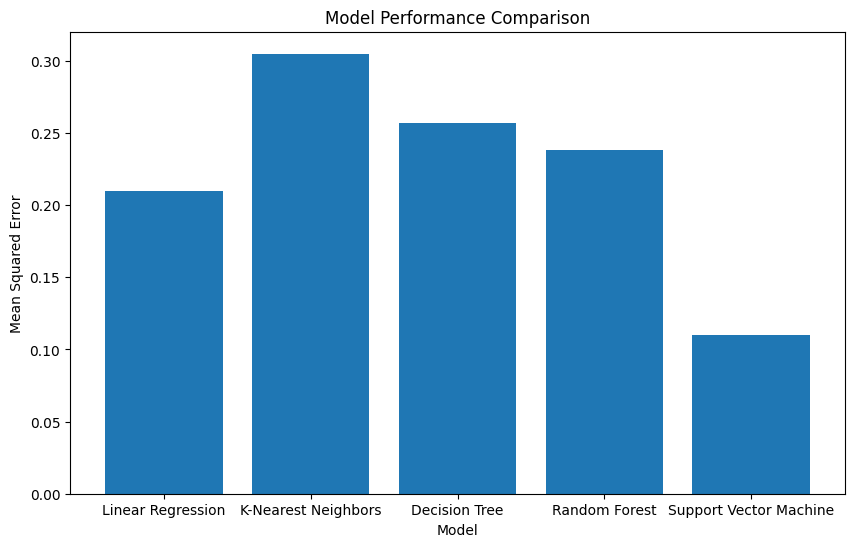

In [142]:
#Visualizations
#Bar plot for model performance
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Model Performance Comparison')
plt.show()

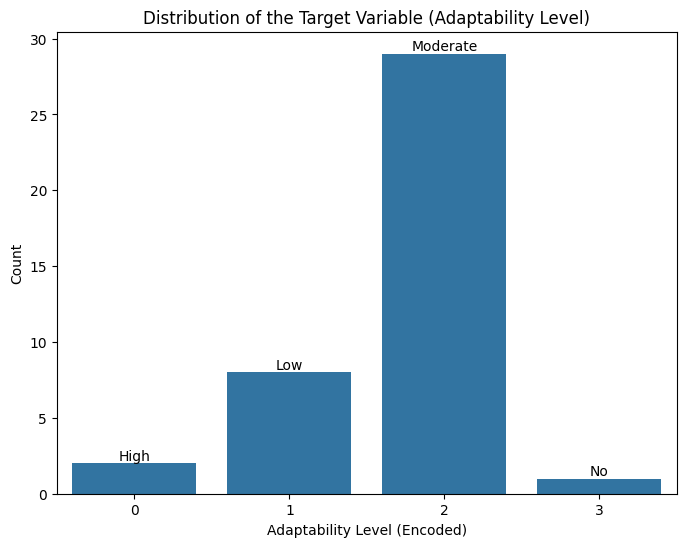

In [143]:
#Visualizing the distribution of the target variable
plt.figure(figsize=(8, 6))
#The target variable 'y' represents the encoded 'Adaptability Level' of students.
#The countplot shows the frequency of each adaptability level in the dataset.
sns.countplot(x=y)
plt.title('Distribution of the Target Variable (Adaptability Level)')
plt.xlabel('Adaptability Level (Encoded)')
plt.ylabel('Count')
#Get the original labels from the encoder
legend_labels = label_encoder.inverse_transform(np.unique(y))
#Map encoded values to original labels
for i, label in enumerate(legend_labels):
    plt.text(i, y.tolist().count(i), f'{label}', ha='center', va='bottom')

plt.show()

In [144]:
#Display the results
results

{'Linear Regression': 0.20988536207077224,
 'K-Nearest Neighbors': 0.305,
 'Decision Tree': 0.25718836088154273,
 'Random Forest': 0.23830921455003964,
 'Support Vector Machine': 0.10983092231019638}